In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_pickle('cleaned_df_3.pkl')
data.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list
0,196,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,132.5,NaN,Show what you know A,Assessment_A,5,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,"[no, because, you, don't, change, the, denomin...",[],[]
1,197,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,581,NaN,Show what you know A,Assessment_A,6,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,"[i, do, not, know, the, answer]",[],[]
2,723,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,15.75,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,1a,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,"[first, you, need, to, double, the, denominato...",[],[]
3,758,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,0.333,NaN,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,2a,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,"[first, multiply, the, denominator, by, two, t...",[],[]
4,801,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,11,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,3a,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,"[first, multiply, 8, by, 2, then, do, the, sam...","[8, 2]",[]


In [3]:
import codecs
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
data['Level (ProblemSet)'].value_counts()

Erroneous_LCD_Collaboration                           1318
Erroneous_Comparing_Collaboration                     1192
Assessment_A                                           846
Assessment_B                                           835
Erroneous_LCD_Individual                               819
Erroneous_Comparing_Individual                         732
Erroneous_Equivalent_Collaboration                     724
Erroneous_Equivalent_Individual                        498
Erroneous_EquivalentLCD_Collaboration                  158
Erroneous_ComparingAddingSubtracting_Collaboration     102
Erroneous_NamingMaking_Collaboration                    76
Erroneous_NamingMaking_Individual                       13
Erroneous_ComparingAddingSubtracting_Individual         12
Erroneous_EquivalentLCD_Individual                       4
Name: Level (ProblemSet), dtype: int64

In [5]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [6]:
data['problem']=0
for i in range(len(data)):
    data['problem'][i]=int(data['Problem Name'][i][0])
data['problem'].value_counts()

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [7]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [8]:
word_tokenize(data.Input[0])

['no',
 ',',
 'because',
 'you',
 'do',
 "n't",
 'change',
 'the',
 'denominater',
 'so',
 'this',
 'why',
 'this',
 'answer',
 'is',
 'wrong',
 '.']

In [9]:
data.word_list[0]

['no',
 'because',
 'you',
 "don't",
 'change',
 'the',
 'denominator',
 'so',
 'the',
 'why',
 'the',
 'answer',
 'be',
 'wrong']

In [10]:
data['new_answer']=''
all_answer=[]
for i in range(len(data)):
    for temp_word in data.word_list[i]:
        data.new_answer[i]=data.new_answer[i]+temp_word+' '
    all_answer=all_answer+[data.new_answer[i]]

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
data.new_answer[0]

"no because you don't change the denominator so the why the answer be wrong "

In [12]:
all_answer[:10]

["no because you don't change the denominator so the why the answer be wrong ",
 'i do not know the answer ',
 'first you need to double the denominator then do the same to the numerator ',
 'first multiply the denominator by two then do the same to the numerator ',
 'first multiply 8 by 2 then do the same to the numerator ',
 'first must the denominator by 2 then do the same for the numerator ',
 'first multiply the denominator by 2 and do the same to the numerator ',
 'he need to find the least common denominator so they will both be equal he also need to find they multiply and factor ',
 'next time olivia times to find the least common denominator she need to look at her number more careful she had the 1 and the 7 mixed up ',
 'next time kaitie need to compare 12 and 8 with the factor and multiply of 8 and 12 and find there NUMBER ']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_answer)

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(7329, 531)


In [14]:
tfidf

<7329x531 sparse matrix of type '<class 'numpy.float64'>'
	with 65540 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.cluster import KMeans

num_clusters = 5.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.

TypeError: 'float' object cannot be interpreted as an integer

In [16]:
data['Student Response Subtype']=data['Student Response Subtype'].fillna('individual')
data['Student Response Subtype'].value_counts()

individual    5515
Student1       959
Student2       853
Student3         2
Name: Student Response Subtype, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,2))
tfidf_vectorizer=TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(all_answer)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [18]:
len(tfidf_feature_names)
tfidf_feature_names

['10',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18',
 '20',
 '21',
 '24',
 '27',
 '28',
 '2jamal',
 '30',
 '32',
 '34',
 '35',
 '36',
 '40',
 '42',
 '45',
 '64',
 '65',
 '65ths',
 '6x2',
 '6x5',
 '72',
 '96',
 'able',
 'about',
 'above',
 'across',
 'act',
 'actual',
 'add',
 'adjust',
 'advice',
 'after',
 'again',
 'agree',
 'alex',
 'alexander',
 'alison',
 'all',
 'allow',
 'almost',
 'already',
 'also',
 'always',
 'amount',
 'an',
 'and',
 'angelo',
 'angle',
 'anne',
 'another',
 'answer',
 'any',
 'anything',
 'anyway',
 'apart',
 'area',
 'around',
 'as',
 'ask',
 'assume',
 'at',
 'attend',
 'attention',
 'away',
 'back',
 'bar',
 'base',
 'basic',
 'be',
 'because',
 'become',
 'been',
 'before',
 'besides',
 'best',
 'better',
 'between',
 'big',
 'bigger',
 'bit',
 'both',
 'bottom',
 'brad',
 'brain',
 'break',
 'but',
 'by',
 'calculate',
 'can',
 'cannot',
 'careful',
 'case',
 'cause',
 'change',
 'check',
 'choose',
 'circle',
 'class',
 'clear',
 'clearly',
 'close',
 'c

In [19]:
tfidf_vectorizer.get_values()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_values'

In [20]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]
'''

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=8).fit(tfidf)\nkm_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))\ndata['km_cluster']=0\nfor i in range(len(data)):\n    data['km_cluster'][i]=km_predict[i]\n"

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
km_predict

array([8, 4, 5, ..., 8, 8, 3])

In [22]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['km_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Equivalent Erroneous Collaboration                            0.294976
Equivalent Erroneous Individual                               0.244733
LCD Erroneous Collaboration                                   0.136143
Comparing Erroneous Collaboration                             0.129660
Comparing Erroneous Individual                                0.066451
Equivalent and LCD Erroneous Collaboration                    0.051864
LCD Erroneous Individual                                      0.050243
Comparing, Adding, and Subtracting Erroneous Collaboration    0.012966
Comparing, Adding, and Subtracting Erroneous Individual       0.006483
Equivalent and LCD Erroneous Individual                       0.004862
Show what you know A                                          0.001621
Name: Level (Assignment), dtype: float64
-----------------------------------------
For K-means cluster 1
LCD Erroneous Collaboration                                   0.368298
Comparing Erroneous C

In [24]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['problem'].value_counts()/len(data[data['km_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

For K-means cluster 0
2    0.254457
1    0.183144
3    0.145867
4    0.129660
5    0.098865
6    0.085900
8    0.055105
7    0.047002
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 1
5    0.226107
3    0.214452
1    0.130536
2    0.121212
4    0.111888
6    0.090909
7    0.053613
8    0.051282
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 2
1    0.203562
3    0.178117
2    0.147583
4    0.114504
7    0.096692
6    0.096692
5    0.096692
8    0.066158
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 3
6    0.987179
1    0.008547
7    0.004274
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 4
5    0.201395
1    0.159070
2    0.150698
3    0.127442
4    0.115349
6    0.111628
7    0.072558
8    0.061860
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 5
1    0.291560
2   

In [25]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['km_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Erroneous_Equivalent_Collaboration                    0.294976
Erroneous_Equivalent_Individual                       0.244733
Erroneous_LCD_Collaboration                           0.136143
Erroneous_Comparing_Collaboration                     0.129660
Erroneous_Comparing_Individual                        0.066451
Erroneous_EquivalentLCD_Collaboration                 0.051864
Erroneous_LCD_Individual                              0.050243
Erroneous_ComparingAddingSubtracting_Collaboration    0.012966
Erroneous_ComparingAddingSubtracting_Individual       0.006483
Erroneous_EquivalentLCD_Individual                    0.004862
Assessment_A                                          0.001621
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For K-means cluster 1
Erroneous_LCD_Collaboration                           0.368298
Erroneous_Comparing_Collaboration                     0.233100
Erroneous_LCD_Individual                              

In [26]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['km_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
individual    0.687196
Student1      0.163695
Student2      0.149109
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 1
individual    0.659674
Student1      0.174825
Student2      0.165501
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 2
individual    0.699746
Student2      0.173028
Student1      0.127226
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 3
individual    0.995726
Student1      0.004274
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 4
individual    0.75907
Student1      0.13907
Student2      0.10093
Student3      0.00093
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 5
individual    0.638107
Student2      0.181586
Student1      0.180307
Name: Student

In [27]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=10, gamma=0.1).fit_predict(tfidf)
sp_cluster

array([4, 1, 4, ..., 4, 2, 7])

In [28]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['sp_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
LCD Erroneous Collaboration                                   0.301189
Comparing Erroneous Collaboration                             0.221929
Equivalent Erroneous Collaboration                            0.147952
LCD Erroneous Individual                                      0.116248
Equivalent Erroneous Individual                               0.083223
Comparing Erroneous Individual                                0.055482
Equivalent and LCD Erroneous Collaboration                    0.023778
Comparing, Adding, and Subtracting Erroneous Collaboration    0.018494
Show what you learned B                                       0.011889
Naming and Making Erroneous Collaboration                     0.007926
Show what you learned A                                       0.005284
Equivalent Erroneous Group                                    0.003963
Naming and Making Erroneous Individual                        0.002642
Name: Level (Assignment), dtype: float64
-------------

In [29]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['problem'].value_counts()/len(data[data['sp_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
1    0.295905
2    0.196830
3    0.132100
4    0.113606
5    0.103038
8    0.052840
7    0.052840
6    0.052840
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 1
5    0.293973
1    0.173432
2    0.168512
3    0.121771
4    0.113161
6    0.066421
7    0.043050
8    0.019680
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 2
5    0.728188
3    0.068792
2    0.068792
1    0.043624
4    0.035235
6    0.023490
7    0.020134
8    0.011745
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 3
2    0.193309
1    0.193309
3    0.182156
5    0.126394
4    0.111524
6    0.085502
7    0.063197
8    0.044610
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 4
1    0.250585
6    0.196721
2    0.166276
5    0.138173
3    0.119438
4    0.055035
8    0.039813
7    0.033958
Name: problem, dtype: float64
-------

In [30]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['sp_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
Erroneous_LCD_Collaboration                           0.301189
Erroneous_Comparing_Collaboration                     0.221929
Erroneous_Equivalent_Collaboration                    0.147952
Erroneous_LCD_Individual                              0.116248
Erroneous_Equivalent_Individual                       0.087186
Erroneous_Comparing_Individual                        0.055482
Erroneous_EquivalentLCD_Collaboration                 0.023778
Erroneous_ComparingAddingSubtracting_Collaboration    0.018494
Assessment_B                                          0.011889
Erroneous_NamingMaking_Collaboration                  0.007926
Assessment_A                                          0.005284
Erroneous_NamingMaking_Individual                     0.002642
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For Spectral Cluster 1
Erroneous_LCD_Collaboration                           0.182042
Erroneous_Comparing_Collaboration                   

In [31]:
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['sp_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For Spectral Cluster 0
individual    0.636724
Student2      0.190225
Student1      0.173052
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 1
individual    0.731857
Student2      0.143911
Student1      0.124231
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 2
individual    0.902685
Student1      0.050336
Student2      0.046980
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 3
individual    0.576208
Student1      0.282528
Student2      0.141264
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 4
individual    0.731850
Student2      0.139344
Student1      0.128806
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 5
individual    0.630170
Student2      0.184915
Student1      0.184915
Nam

In [32]:
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=5)
gmm.fit(tfidf)
gmm_cluster=gmm.predict(tfidf)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [33]:
from sklearn.cluster import AgglomerativeClustering
ac_cluster = AgglomerativeClustering().fit(tfidf)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [34]:
data['km_cluster'].value_counts()

4    2150
8    1412
5     782
9     763
0     617
1     429
2     393
7     282
6     267
3     234
Name: km_cluster, dtype: int64

In [35]:
data['sp_cluster'].value_counts()

6    1996
4     854
1     813
0     757
7     651
2     596
8     516
9     466
5     411
3     269
Name: sp_cluster, dtype: int64

In [36]:
data['problem'].value_counts()

5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [37]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [38]:
from scipy import stats
from scipy.stats import ttest_ind

In [39]:
ttest_ind(data['km_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.7241381645413549, pvalue=0.4794363026149864)

In [40]:
ttest_ind(data['km_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=1.831130526784623, pvalue=0.07813826254548216)

In [41]:
ttest_ind(data['sp_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.8545636647356315, pvalue=0.4054069920145179)

In [42]:
ttest_ind(data['sp_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=2.049673869783626, pvalue=0.050224666931142206)

In [ ]:
clue hint
correct right
total
4/6 FRACTION
1+1=2 EQUATION


In [43]:
sklearn.metrics.homogeneity_completeness_v_measure(np.array([1,1,2,2,3]), np.array([1,1,1,1,1]), beta=1.0)

(-2.1048474724766827e-16, 1.0, -4.2096949449533665e-16)

In [ ]:
ANALYSIS 
TYPO FIXING 
CLUSTERING
SUPERVISED

In [44]:
#sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

In [45]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

(0.08857233703537985, 0.0910701884006538, 0.08980389694833658)

In [46]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['Level (Assignment)'], beta=1.0)

(0.1809772555304789, 0.1543461478501305, 0.16660419140451455)

In [47]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['problem'], beta=1.0)

(0.09817364437672385, 0.10631209985178837, 0.10208091838547785)

In [48]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['Level (Assignment)'], beta=1.0)

(0.14420774665566027, 0.12952990287043045, 0.13647531093957865)

In [49]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(tfidf_vectorizer.transform(all_answer))
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(tfidf)

In [51]:
iso_predict

array([[ 0.10165969, -0.09163358, -1.29621895],
       [ 0.63663656,  0.83748766, -3.03374999],
       [ 0.55709727, -1.04608792, -0.03275649],
       ...,
       [-2.36866618,  1.7289559 ,  0.09133213],
       [-0.18431642, -0.84477473, -0.19788599],
       [-2.98225973,  0.8992157 ,  0.78384196]])

In [52]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(tfidf)
svd_predict

array([[ 0.3717681 , -0.18013666, -0.021948  ],
       [ 0.23045938, -0.03766802,  0.00350996],
       [ 0.54646676,  0.09187317,  0.13477624],
       ...,
       [ 0.32329569, -0.20876068,  0.0017414 ],
       [ 0.19744705, -0.12980901, -0.08468545],
       [ 0.29805696, -0.47503644, -0.26936763]])

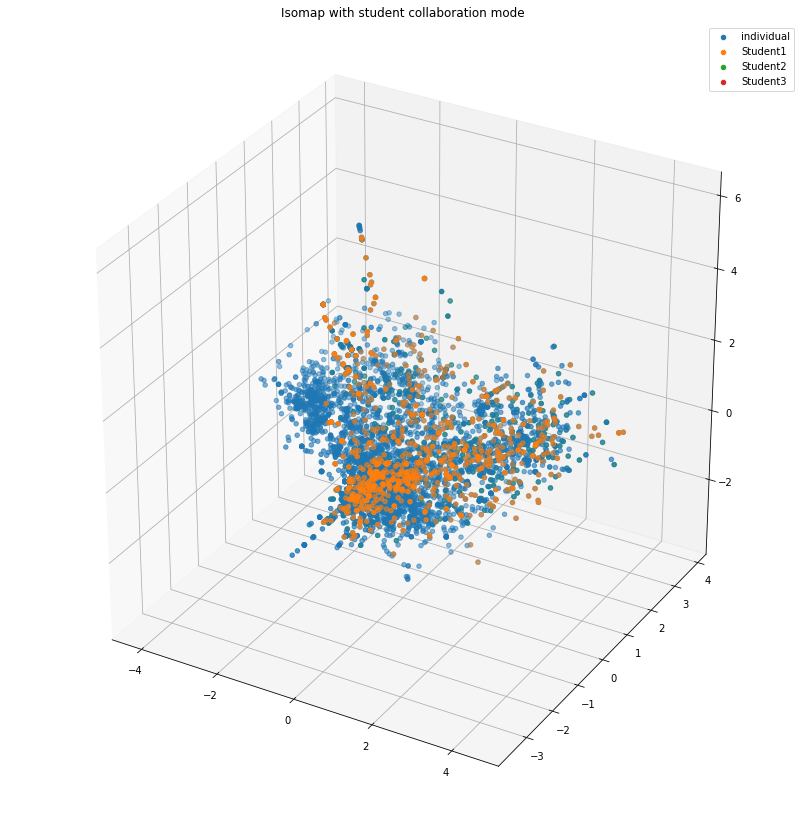

In [53]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with student collaboration mode')
plt.show()

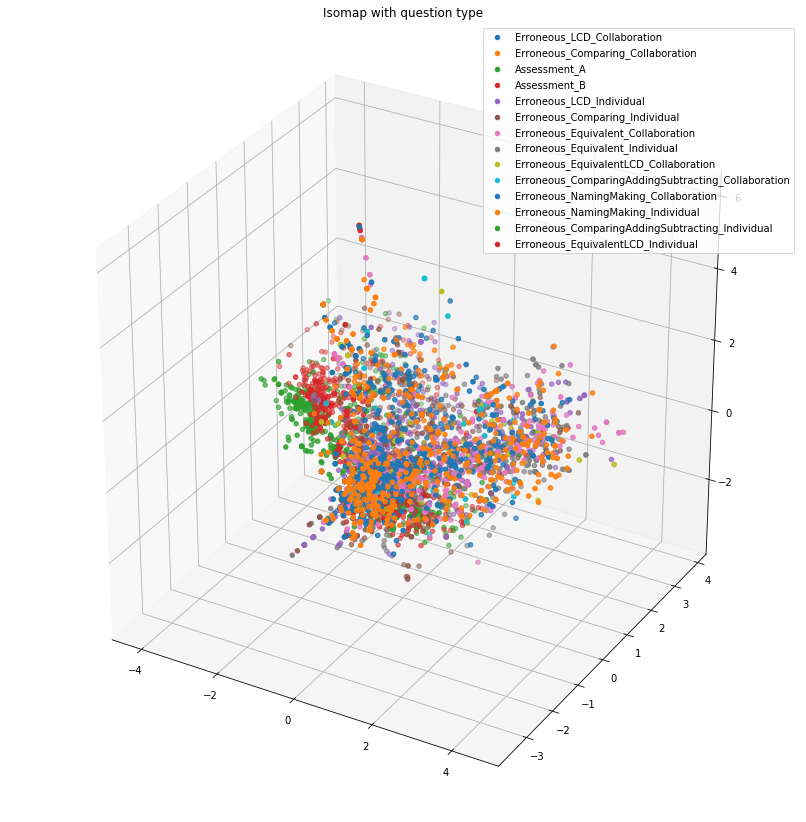

In [54]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with question type')
plt.show()

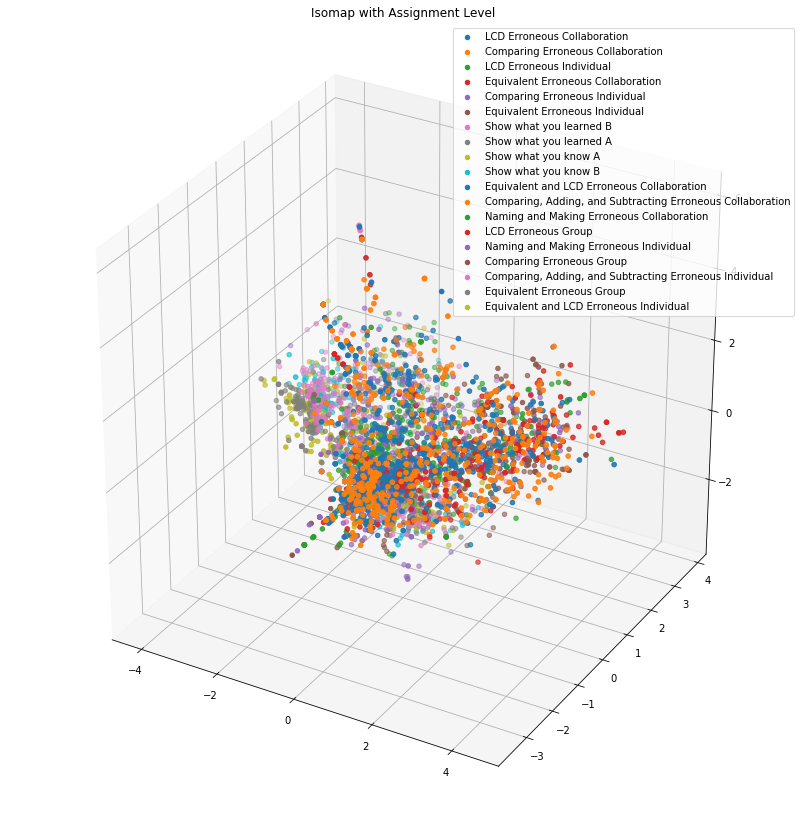

In [55]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Assignment Level')
plt.show()

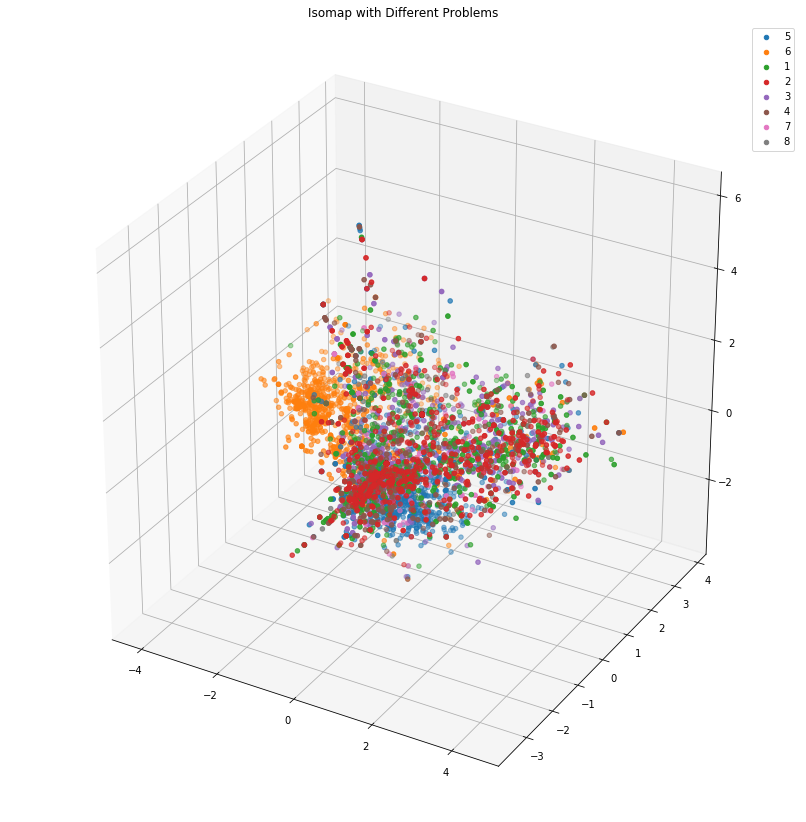

In [56]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Different Problems')
plt.show()

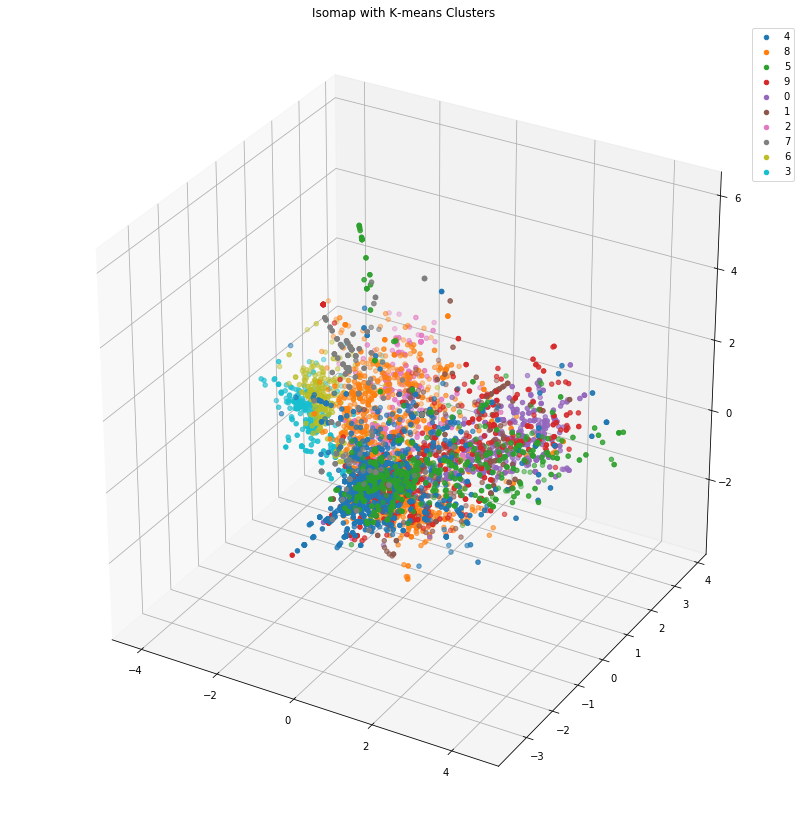

In [57]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

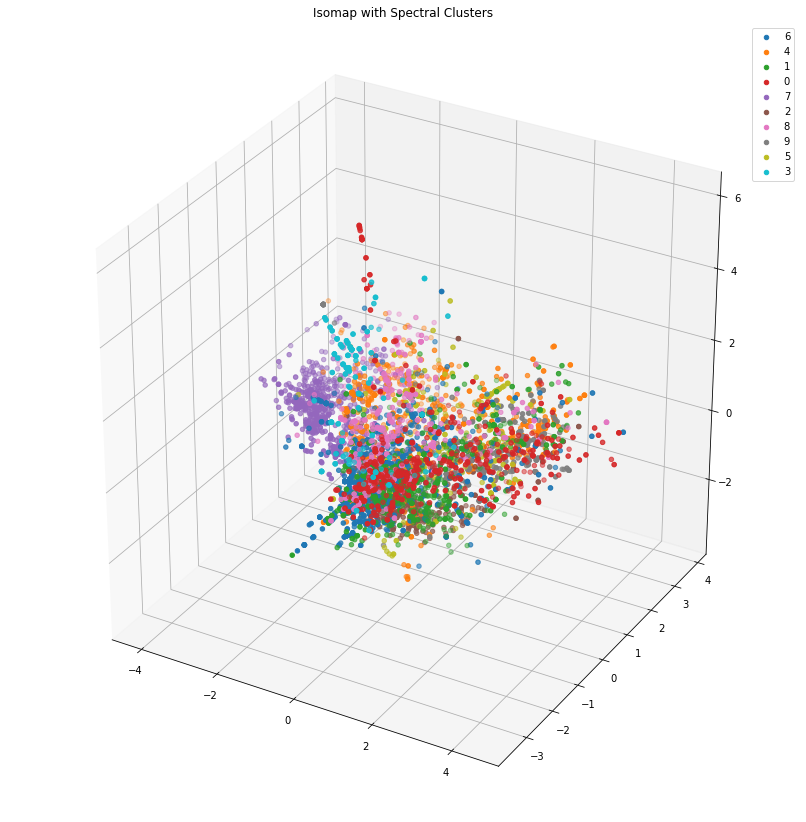

In [58]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

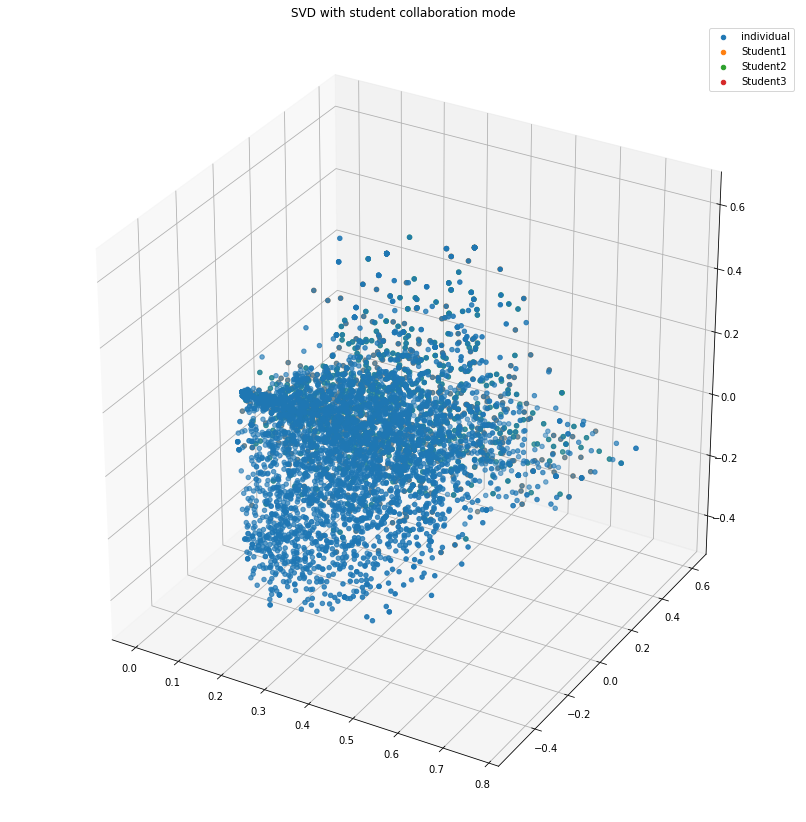

In [59]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with student collaboration mode')
plt.show()

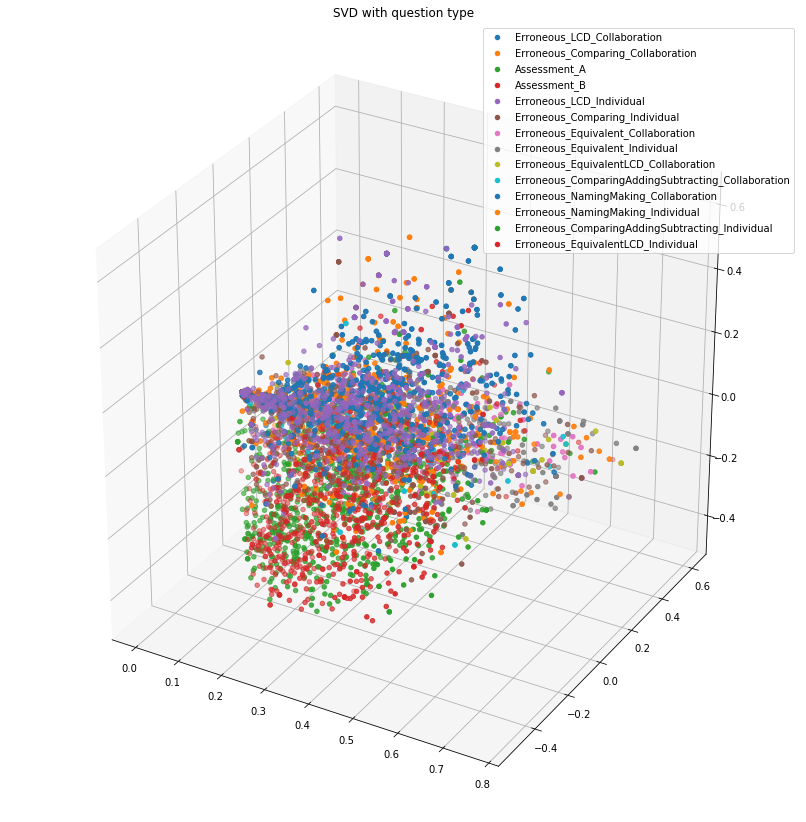

In [60]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with question type')
plt.show()

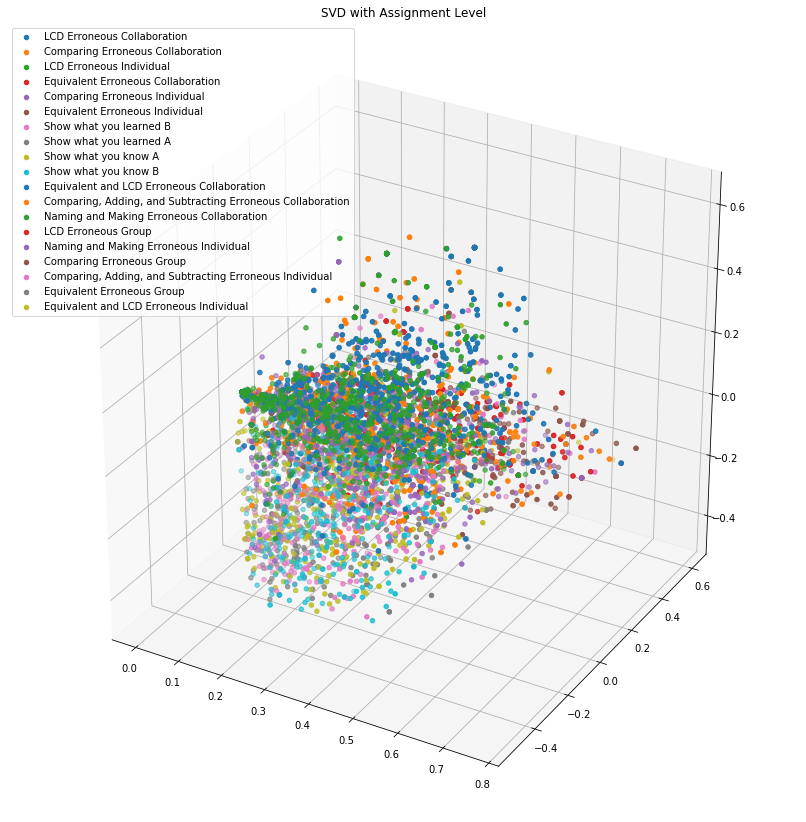

In [61]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Assignment Level')
plt.show()

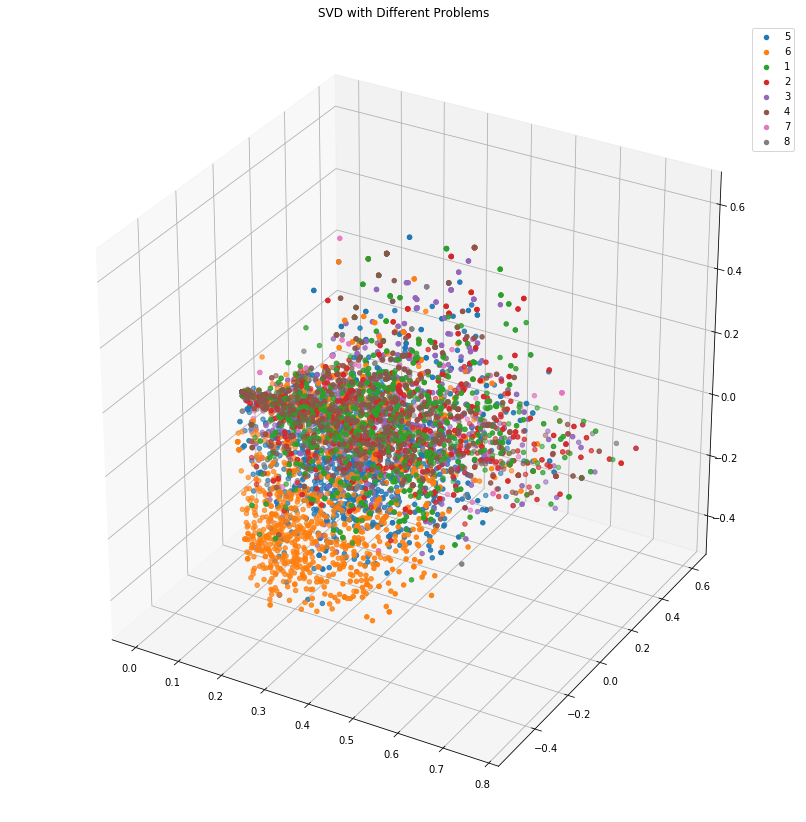

In [62]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Different Problems')
plt.show()

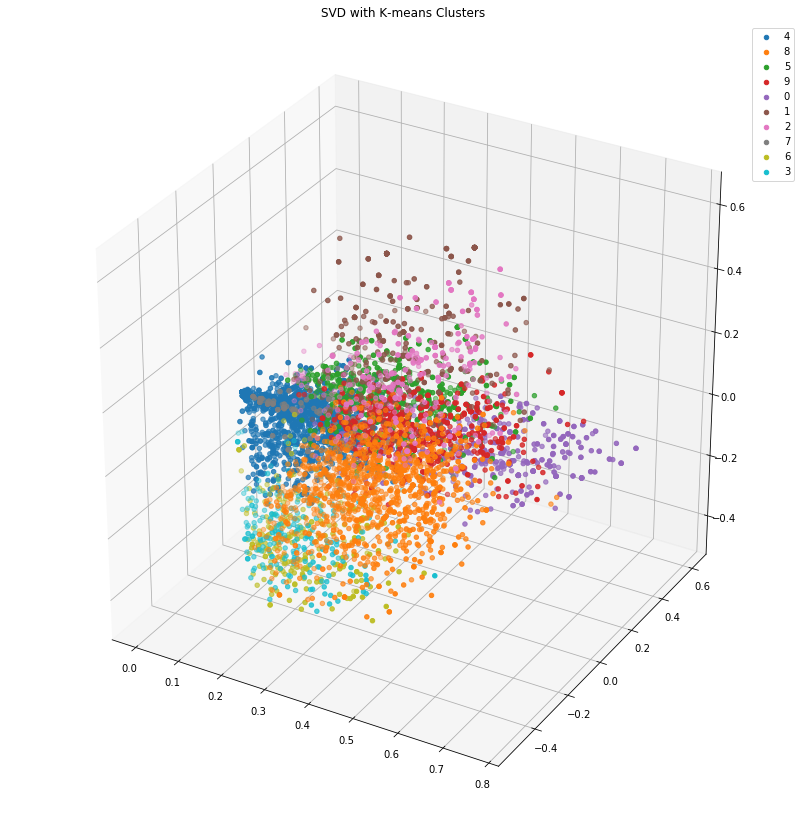

In [63]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

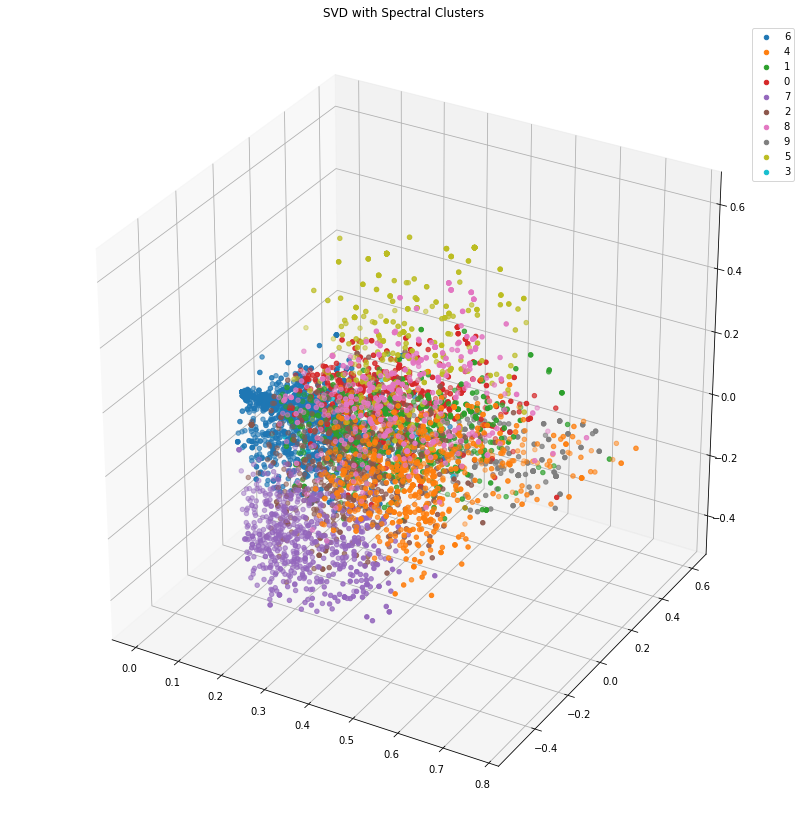

In [64]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

In [44]:
#tf_vectorizer = CountVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,2))
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(all_answer)
tf_feature_names = tf_vectorizer.get_feature_names()

In [121]:
kmeans = KMeans(n_clusters=10).fit(tf)
kmeans.predict(tfidf_vectorizer.transform(all_answer))

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.6, init='nndsvd').fit(tfidf)

In [45]:
lda = LatentDirichletAllocation(n_topics=10, max_iter=500, learning_method='online', learning_offset=10.,random_state=0).fit(tf)

TypeError: __init__() got an unexpected keyword argument 'n_topics'

In [ ]:
cluster_data=data[]